In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
df = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [4]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [5]:
df['class'].unique()

array(['water', 'forest', 'impervious', 'farm', 'grass', 'orchard'],
      dtype=object)

In [6]:
df['class'].value_counts()

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64

In [7]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

20140423_N    1760
20140626_N    1600
20140218_N    1440
20141016_N    1440
20150226_N    1360
20141117_N    1280
20140117_N    1200
20150602_N    1200
20140322_N    1120
20150330_N    1120
20150125_N    1040
20150501_N     960
20140509_N     880
20150109_N     880
20140930_N     800
20150517_N     800
20140525_N     720
20150314_N     720
20140407_N     640
20150210_N     640
20140202_N     560
20150720_N     560
20140813_N     560
20140610_N     480
20150415_N     480
20141101_N     400
20140101_N     400
dtype: int64

In [8]:
ndvi_cols = [col for col in df.columns if '_N' in col]

df[ndvi_cols].describe().round(2).T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
20150720_N,5845.48,2261.41,-433.74,8376.15
20150602_N,4868.09,2758.50,-1781.79,8566.42
20150517_N,4469.84,2876.22,-2939.74,8650.50
20150501_N,5193.49,2510.39,-1924.36,8516.10
20150415_N,2927.59,2728.33,-1794.87,8267.12
20150330_N,4924.49,2600.42,-1848.91,8499.33
20150314_N,3313.88,2434.83,-1574.97,8001.70
20150226_N,4987.52,2674.96,-2532.49,8452.38
20150210_N,4320.96,2807.50,-3403.05,8422.06
20150125_N,5237.04,2762.49,-2849.86,8401.10


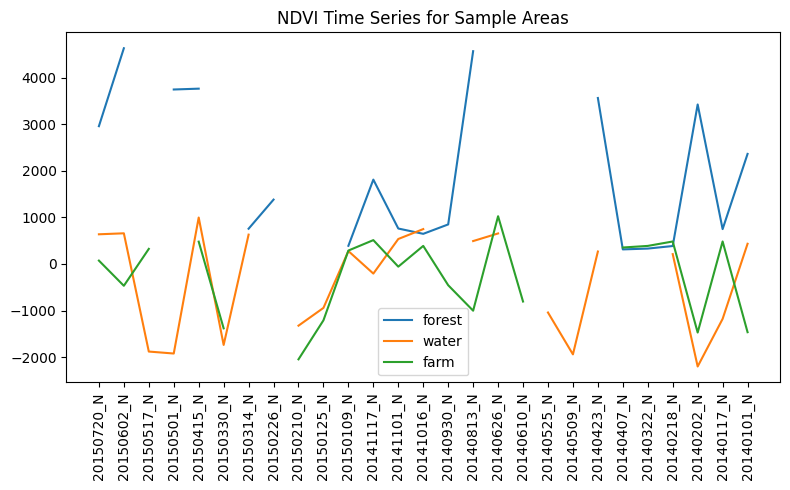

In [9]:
import matplotlib.pyplot as plt

sample_forest = df[df['class'] == 'forest'].iloc[0]
sample_water = df[df['class'] == 'water'].iloc[0]
sample_farm = df[df['class'] == 'farm'].iloc[0]

plt.figure(figsize=(8,5))
plt.plot(ndvi_cols, sample_forest[ndvi_cols], label='forest')
plt.plot(ndvi_cols, sample_water[ndvi_cols], label='water')
plt.plot(ndvi_cols, sample_farm[ndvi_cols], label='farm')
plt.xticks(rotation=90)
plt.legend()
plt.title('NDVI Time Series for Sample Areas')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.impute import KNNImputer

ndvi_cols = [col for col in df.columns if '_N' in col]
ndvi_data = df[ndvi_cols]

imputer = KNNImputer(n_neighbors=5)  
df[ndvi_cols] = imputer.fit_transform(ndvi_data)

In [11]:
df.isnull().sum()

Unnamed: 0    0
ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

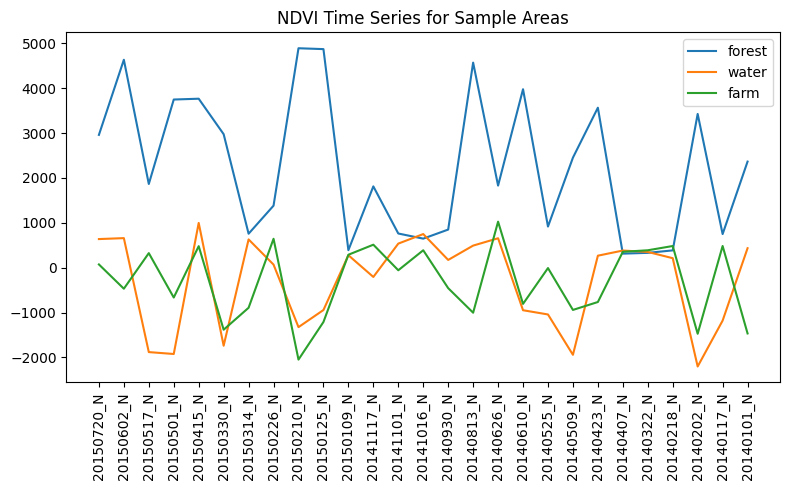

In [12]:
sample_forest = df[df['class'] == 'forest'].iloc[0]
sample_water = df[df['class'] == 'water'].iloc[0]
sample_farm = df[df['class'] == 'farm'].iloc[0]

plt.figure(figsize=(8,5))
plt.plot(ndvi_cols, sample_forest[ndvi_cols], label='forest')
plt.plot(ndvi_cols, sample_water[ndvi_cols], label='water')
plt.plot(ndvi_cols, sample_farm[ndvi_cols], label='farm')
plt.xticks(rotation=90)
plt.legend()
plt.title('NDVI Time Series for Sample Areas')
plt.tight_layout()
plt.show()

In [13]:
df['ndvi_mean'] = df[ndvi_cols].mean(axis=1)
df['ndvi_std']  = df[ndvi_cols].std(axis=1)
df['ndvi_min']  = df[ndvi_cols].min(axis=1)
df['ndvi_max']  = df[ndvi_cols].max(axis=1)
df['ndvi_range'] = df['ndvi_max'] - df['ndvi_min']
df['ndvi_q25']  = df[ndvi_cols].quantile(0.25, axis=1)
df['ndvi_q75']  = df[ndvi_cols].quantile(0.75, axis=1)
df['ndvi_median'] = df[ndvi_cols].median(axis=1)
df['ndvi_skew'] = df[ndvi_cols].skew(axis=1)
df['ndvi_positive_days'] = (df[ndvi_cols] > 0).sum(axis=1)

In [14]:
feature_cols = ['ndvi_mean', 'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_q25', 'ndvi_q75','ndvi_median','ndvi_skew', 'ndvi_positive_days']

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])  

In [16]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df['class_encoded']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced')

# Define parameters grid to try different C values
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

print("Best C:", grid_search.best_params_['C'])

print("Best CV accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Best C: 0.01
Best CV accuracy: 0.63515625
Validation Accuracy: 0.654375


In [18]:
test_df = pd.read_csv('/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv')

ndvi_cols = [col for col in test_df.columns if col.endswith('_N')]
test_df[ndvi_cols] = imputer.transform(test_df[ndvi_cols])

# Create the same features as training
test_df['ndvi_mean'] = test_df[ndvi_cols].mean(axis=1)
test_df['ndvi_std']  = test_df[ndvi_cols].std(axis=1)
test_df['ndvi_min']  = test_df[ndvi_cols].min(axis=1)
test_df['ndvi_max']  = test_df[ndvi_cols].max(axis=1)
test_df['ndvi_range'] = test_df['ndvi_max'] - test_df['ndvi_min']
test_df['ndvi_q25']  = test_df[ndvi_cols].quantile(0.25, axis=1)
test_df['ndvi_q75']  = test_df[ndvi_cols].quantile(0.75, axis=1)
test_df['ndvi_median'] = test_df[ndvi_cols].median(axis=1)
test_df['ndvi_skew'] = test_df[ndvi_cols].skew(axis=1)
test_df['ndvi_positive_days'] = (test_df[ndvi_cols] > 0).sum(axis=1)

feature_cols = ['ndvi_mean', 'ndvi_std', 'ndvi_min', 'ndvi_max', 'ndvi_range', 'ndvi_q25', 'ndvi_q75','ndvi_median','ndvi_skew', 'ndvi_positive_days']

In [19]:
X_test = test_df[feature_cols]
X_test_scaled = scaler.transform(X_test)
test_pred_encoded = best_model.predict(X_test_scaled)

In [20]:
test_pred = le.inverse_transform(test_pred_encoded)

In [21]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'class': test_pred
})

submission.to_csv('submission.csv', index=False)